In [1]:
import numpy as np

import torch
from torch import nn
from torch.utils.data import DataLoader

from tempo.models import NewTempoLinear
from tempo.data.datasets import finetune_dataset2

from torchvision.transforms import Normalize

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [2]:
normalize = Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

# load models
weights_tp = torch.load('../model_zoo/test_18.pth')
model_tp = NewTempoLinear(out_features=24, weights=None,freeze_backbone=True)
model_tp.load_state_dict(weights_tp)
_ = model_tp.eval()

weights_bl = torch.load('../model_zoo/baseline.pth')
model_bl = NewTempoLinear(out_features=24, weights=None,freeze_backbone=True)
model_bl.load_state_dict(weights_bl)
_ = model_bl.eval()

In [3]:
embeddings = []
targets = []

In [4]:
test_loader = finetune_dataset2(train=False, batch_size=1)

In [5]:
images, labels = next(iter(test_loader))
images = normalize(images)

In [6]:
for image, label in test_loader:
        with torch.no_grad():
                preds = model_bl.backbone(image)
        embeddings.append(preds.squeeze()[None])
        targets.append(label)
embeddings = torch.cat(embeddings, dim=0)
targets = torch.cat(targets)

In [7]:
embeddings.shape, targets.shape

(torch.Size([120, 512]), torch.Size([120]))

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
embs = pca.fit_transform(embeddings)

In [10]:
embs.shape

(120, 2)

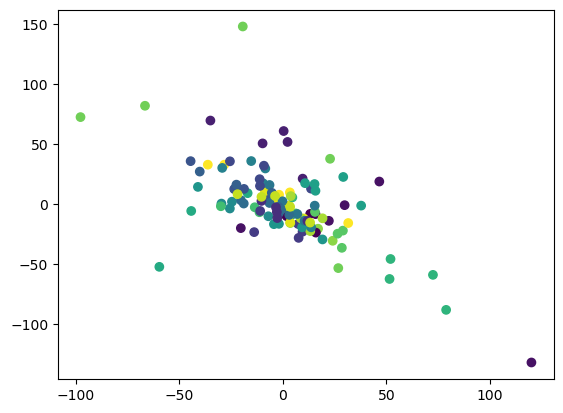

In [11]:
plt.scatter(embs[:,0], embs[:,1], c=targets)